# 4. Creating Plots on Data Aware Grids

Menggunakan Seaborn untuk menggambar beberapa plot dalam satu gambar.

## Using FacetGrid, factorplot and lmplot

### Building a FacetGrid

FacetGrid milik Seaborn adalah fondasi untuk membangun *data-aware grids*. *data-aware grids* memungkinkan Anda membuat serangkaian plot kecil yang dapat berguna untuk memahami hubungan data yang kompleks.

Untuk latihan-latihan ini, kita akan terus menggunakan Data Scorecard Perguruan Tinggi dari Departemen Pendidikan AS. Kumpulan data yang kaya ini memiliki banyak elemen data menarik yang dapat kita plot dengan Seaborn.

Saat membangun `FacetGrid`, ada dua langkah:
* Buat objek `FacetGrid` dengan kolom, baris, atau hue.
* Memetakan masing-masing plot ke grid.

In [3]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read in the DataFrame
df = pd.read_csv("datasets/college_datav3.csv")
# Print data
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


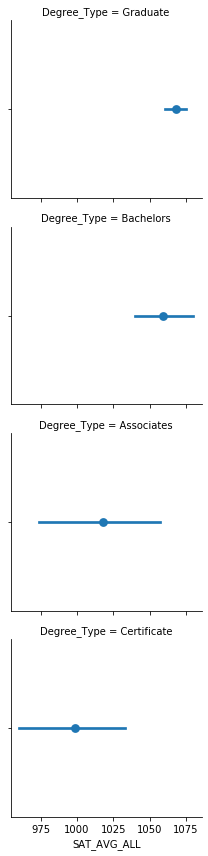

<Figure size 432x288 with 0 Axes>

In [6]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

**Note** : Plot ini memberi tahu kami banyak tentang hubungan antara skor SAT rata-rata berdasarkan Jenis Gelar yang ditawarkan di universitas.

### Using a factorplot

Dalam banyak kasus, `factorplot()` Seaborn dapat menjadi cara yang lebih sederhana untuk membuat `FacetGrid`. Alih-alih membuat grid dan memetakan plot, kita dapat menggunakan `factorplot()` untuk membuat plot dengan satu baris kode.

Untuk latihan ini, kami akan membuat ulang salah satu plot dari latihan sebelumnya menggunakan `factorplot()` dan menunjukkan cara membuat boxplot pada *data-aware grid*.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


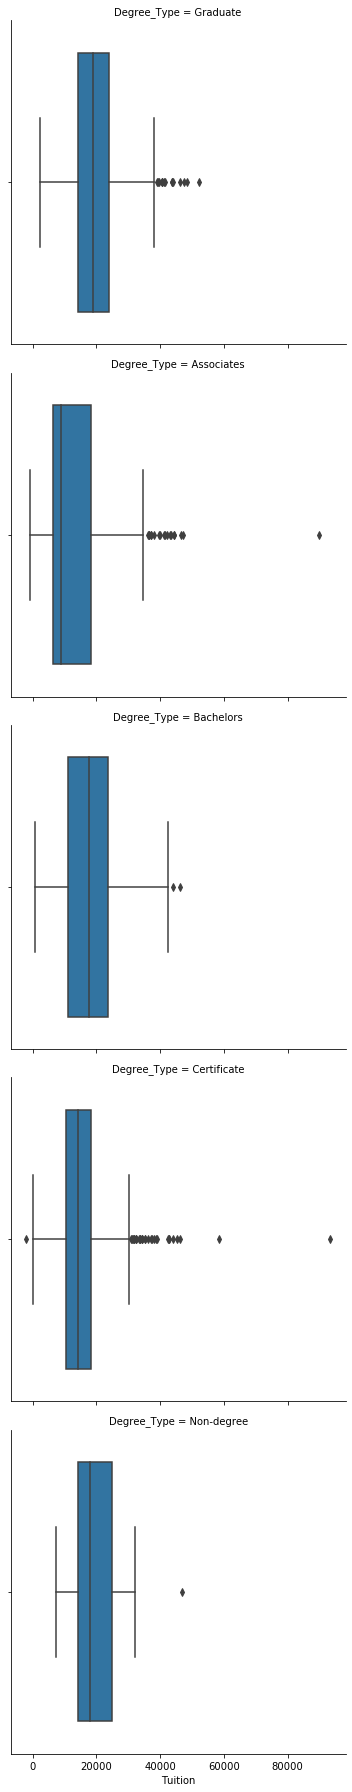

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


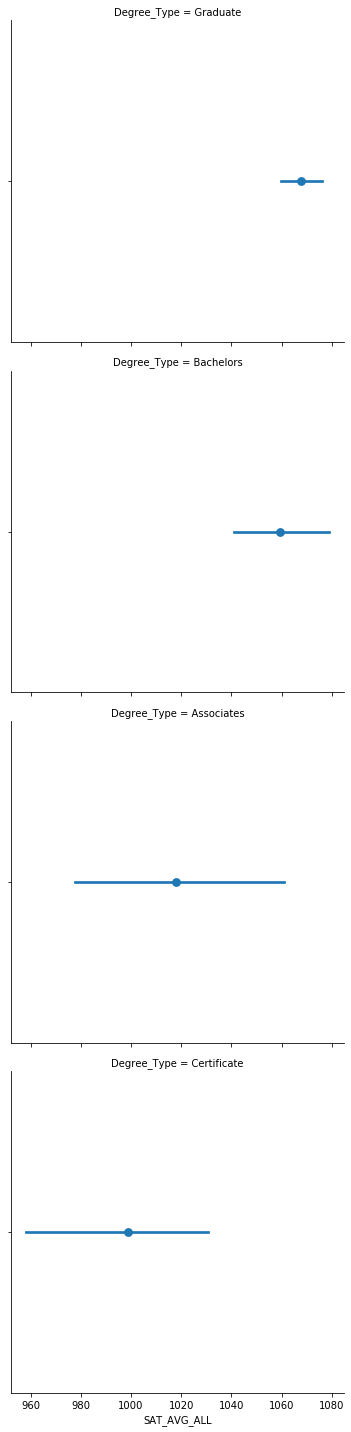

<Figure size 432x288 with 0 Axes>

In [17]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.factorplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

**Note** : `factorplot` seringkali lebih nyaman daripada menggunakan `FacetGrid` untuk membuat *data aware grids*.

### Using a lmplot

`lmplot` digunakan untuk memplot scatter plot dengan garis regresi pada objek `FacetGrid`. API mirip dengan `factorplot` dengan perbedaan bahwa perilaku default `lmplot` adalah dengan memplot garis regresi.

Untuk rangkaian latihan pertama, kita akan melihat populasi Sarjana (`UG`) dan membandingkannya dengan persentase siswa yang menerima Pell Grants (`PCTPELL`).

Untuk latihan `lmplot` kedua, kita dapat melihat hubungan antara skor SAT rata-rata dan biaya kuliah di berbagai jenis gelar dan sekolah negeri vs. sekolah nirlaba.

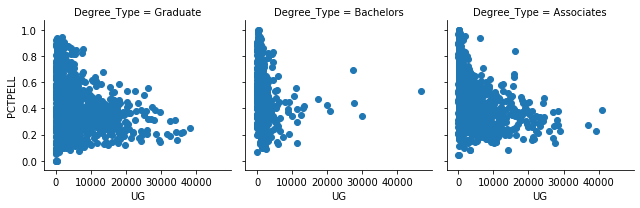

<Figure size 432x288 with 0 Axes>

In [19]:
# List degree order
degree_ord = ['Graduate', 'Bachelors', 'Associates']

# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

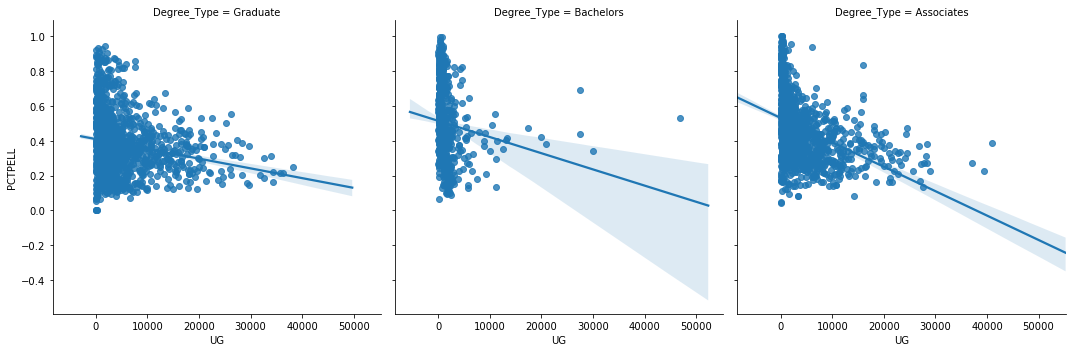

<Figure size 432x288 with 0 Axes>

In [20]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

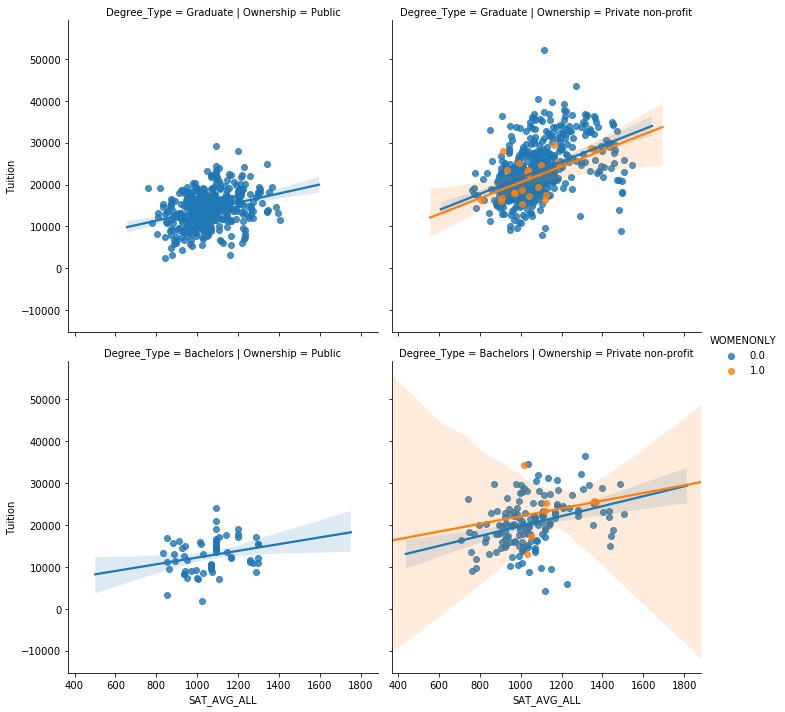

<Figure size 432x288 with 0 Axes>

In [22]:
# List inst order
inst_ord = ['Public', 'Private non-profit']

# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

**Note** : Membuat beberapa plot kecil sangat berguna untuk banyak jenis analisis. Dengan Seaborn, mudah untuk menggunakan tipe plot untuk dengan cepat melakukan visualisasi yang kompleks.

## Using PairGrid and pairplot

### Building a PairGrid

Saat mengeksplorasi dataset, salah satu tugas paling awal adalah mengeksplorasi hubungan antara pasangan variabel. Langkah ini biasanya merupakan awal dari investigasi tambahan.

Seaborn mendukung analisis *pair-wise* ini menggunakan `PairGrid`. Dalam latihan ini, kita akan melihat data Premium Asuransi Mobil yang telah kita analisis pada Bab 1.

In [23]:
# Load data
df = pd.read_csv("datasets/insurance_premiums.csv")

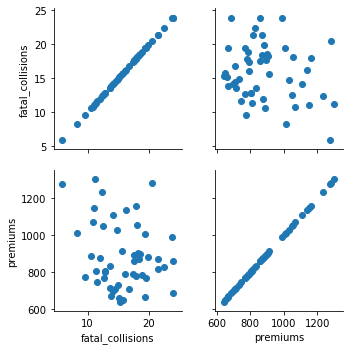

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

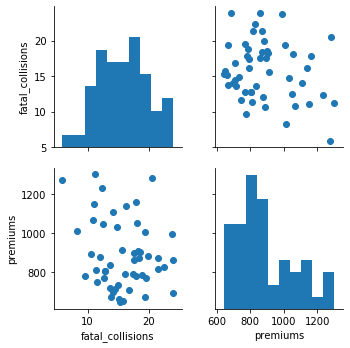

<Figure size 432x288 with 0 Axes>

In [25]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

**Note** : Analisis ini memberikan wawasan yang bermanfaat tentang distribusi jumlah premi serta hubungan terbatas antara `fatal_collision` dan `premiums`.

### Using a pairplot

Fungsi `pairplot()` umumnya merupakan cara yang lebih nyaman untuk melihat hubungan berpasangan. Dalam latihan ini, kita akan membuat hasil yang sama seperti `PairGrid` menggunakan kode lebih sedikit. Kemudian, kami akan mengeksplorasi beberapa fungsi tambahan dari `pairplot()`. Kami juga akan menggunakan palet yang berbeda dan menyesuaikan transparansi plot diagonal menggunakan parameter `alpha`.

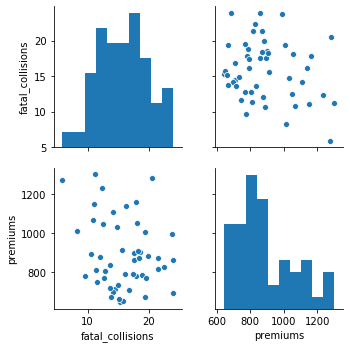

<Figure size 432x288 with 0 Axes>

In [26]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()
plt.clf()

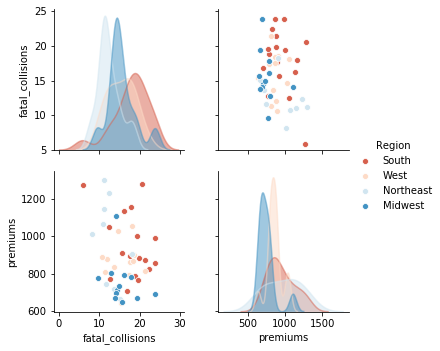

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

**Note** : `pairplot` umumnya lebih sederhana daripada `PairGrid` untuk plotting hubungan yang kompleks.

### Additional pairplots

Latihan ini akan membahas beberapa contoh lebih lanjut tentang bagaimana `pairplot()` dapat dikustomisasi untuk menganalisis data dengan cepat dan menentukan bidang minat yang mungkin layak untuk analisis tambahan.

Salah satu area kustomisasi yang berguna adalah untuk secara eksplisit mendefinisikan `x_vars` dan `y_vars` yang ingin Anda periksa. Alih-alih memeriksa semua hubungan berpasangan, kemampuan ini memungkinkan Anda untuk hanya melihat interaksi spesifik yang mungkin menarik.

Kami telah melihat menggunakan `kind` untuk mengontrol jenis plot. Kita juga dapat menggunakan `diag_kind` untuk mengontrol jenis plot yang ditampilkan pada diagonal. Dalam contoh terakhir, kami akan memasukkan regresi dan plot KDE di `pairplot`.

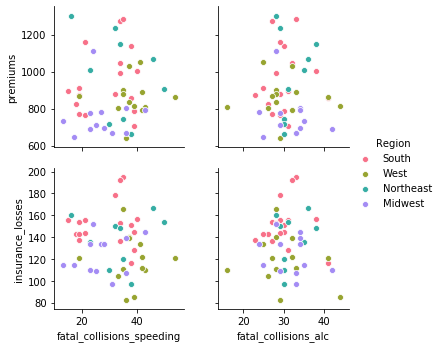

<Figure size 432x288 with 0 Axes>

In [28]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

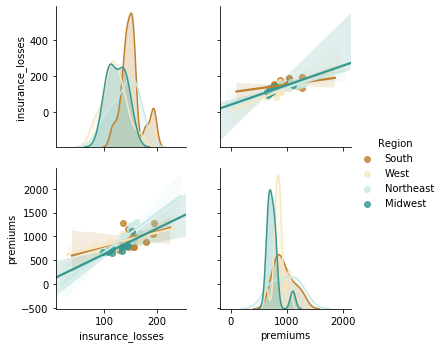

<Figure size 432x288 with 0 Axes>

In [29]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

## Using JointGrid and jointplot

### Building a JointGrid and jointplot

Seaborn `JointGrid` menggabungkan plot univariat seperti histogram, rug plot dan plot kde dengan plot bivariat seperti scatter plot dan regresi. Proses untuk membuat plot ini harus Anda kenal sekarang. Plot ini juga menunjukkan bagaimana Seaborn menyediakan fungsi yang nyaman untuk menggabungkan beberapa plot bersama.

Untuk latihan ini, kami akan menggunakan data berbagi sepeda yang telah kami ulas sebelumnya. Dalam latihan ini, kita akan melihat hubungan antara tingkat kelembaban dan total penyewaan untuk melihat apakah ada hubungan yang menarik yang mungkin ingin kita jelajahi nanti.

In [30]:
# Load data
df = pd.read_csv("datasets/bike_share.csv")
# Print data
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


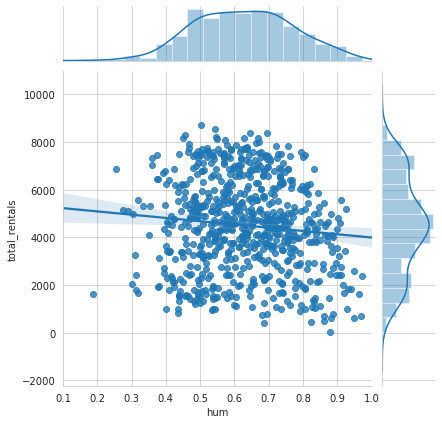

<Figure size 432x288 with 0 Axes>

In [31]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()

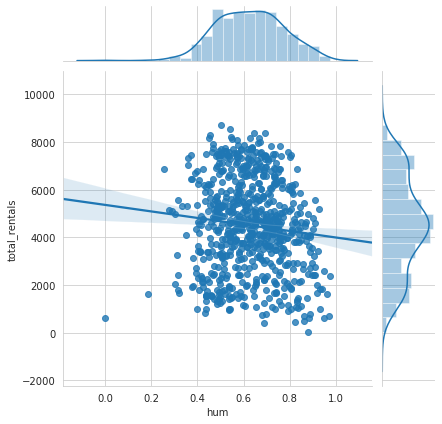

<Figure size 432x288 with 0 Axes>

In [32]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()
plt.clf()

**Note** : Plot-plot ini menunjukkan bahwa ada hubungan yang terbatas antara jumlah sewa dan tingkat kelembaban.

### Jointplots and regression

Karena plot sebelumnya tidak menunjukkan hubungan antara kelembaban dan jumlah sewa, kami dapat melihat variabel lain yang kami ulas sebelumnya. Secara khusus, hubungan antara `temp` dan `total_rentals`.

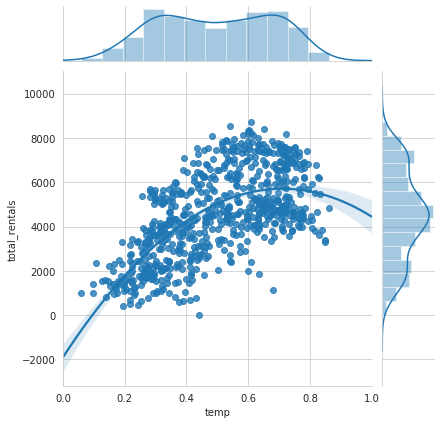

<Figure size 432x288 with 0 Axes>

In [33]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

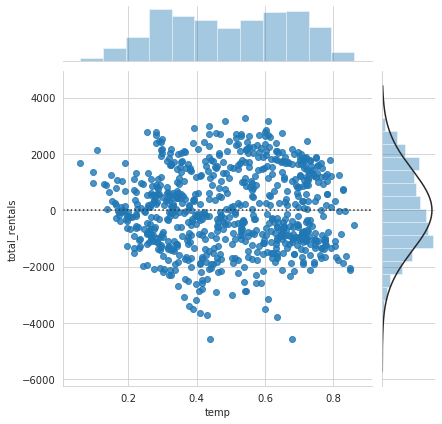

<Figure size 432x288 with 0 Axes>

In [34]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=df,
        order=2)

plt.show()
plt.clf()

**Note** : Berdasarkan plot residual dan nilai pearson r, ada hubungan positif antara suhu dan total_rentals.

### Complex jointplots

`jointplot` adalah pembungkus praktis di sekitar banyak fungsi `JointGrid`. Namun, dimungkinkan untuk melapisi beberapa plot `JointGrid` di atas standar `jointplot`. Dalam contoh ini, kita dapat melihat distribusi yang berbeda untuk pengendara yang dianggap `casual` versus `registered`.

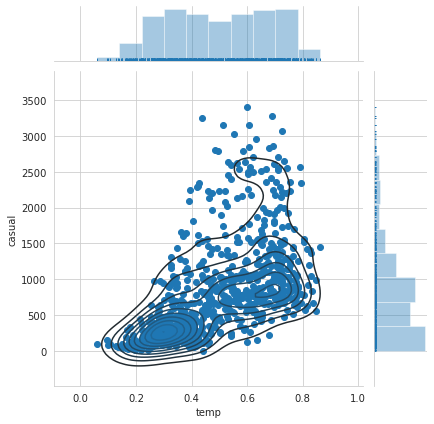

<Figure size 432x288 with 0 Axes>

In [35]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

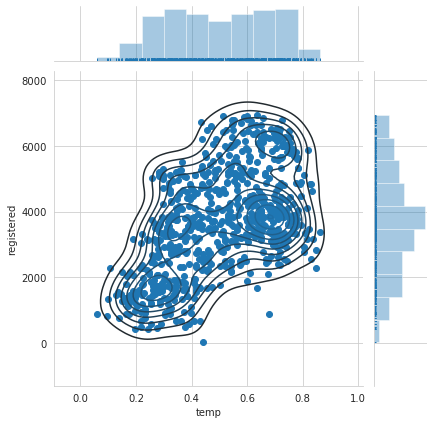

<Figure size 432x288 with 0 Axes>

In [36]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()

**Note** : Anda telah berhasil memvisualisasikan beberapa hubungan data dalam data berbagi sepeda!